# AS HW2

김보람  
2023-04-19

In [4]:
library(tidyverse)

# 1번

‘dt.csv’ 데이터를 이용하여 회귀모형을 적합하려고 한다. 이는 매장별 유아
카시트 판매액(Sales)를 예측하기 위한 데이터 이다. 다음 물음에 답하여라.
(R을 이용하여 풀이)(검정에서는 유의수준 $α = 0.05$ 사용)

## (1)

이 데이터의 산점도 행렬을 그리시오.

In [10]:
dt <- read_csv('dt.csv')
head(dt)

Rows: 400 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): Sales, CompPrice, Income, Advertising, Population, Price, Age, Educ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

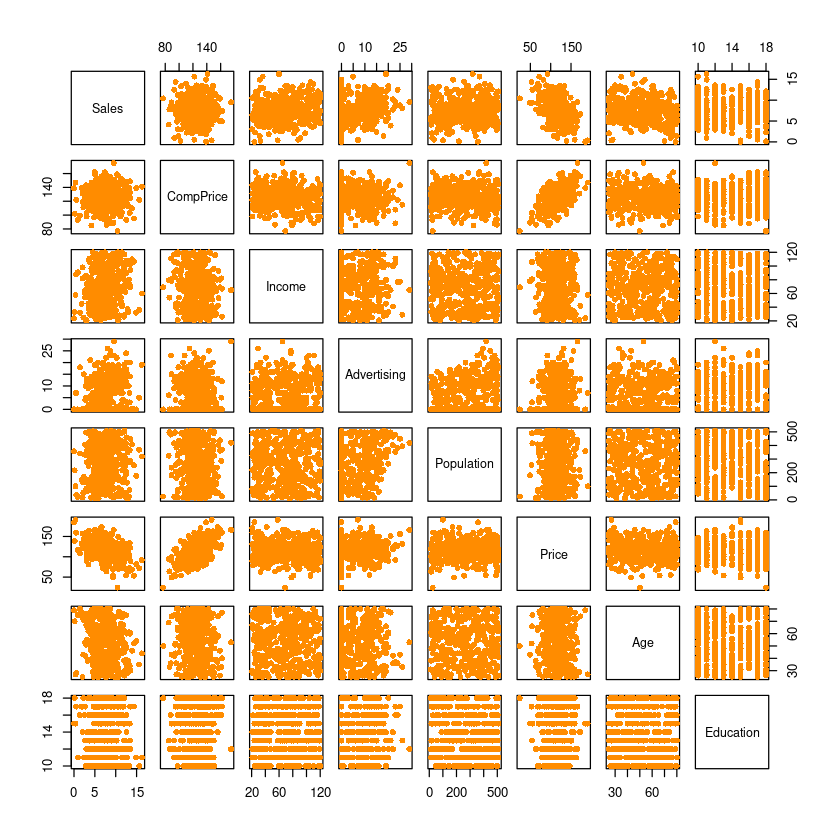

In [11]:
pairs(dt, pch=16, col='darkorange')


-   선형관계가 있어보이는 데이터는, “sales와 price”,“compprice와
    porice”,

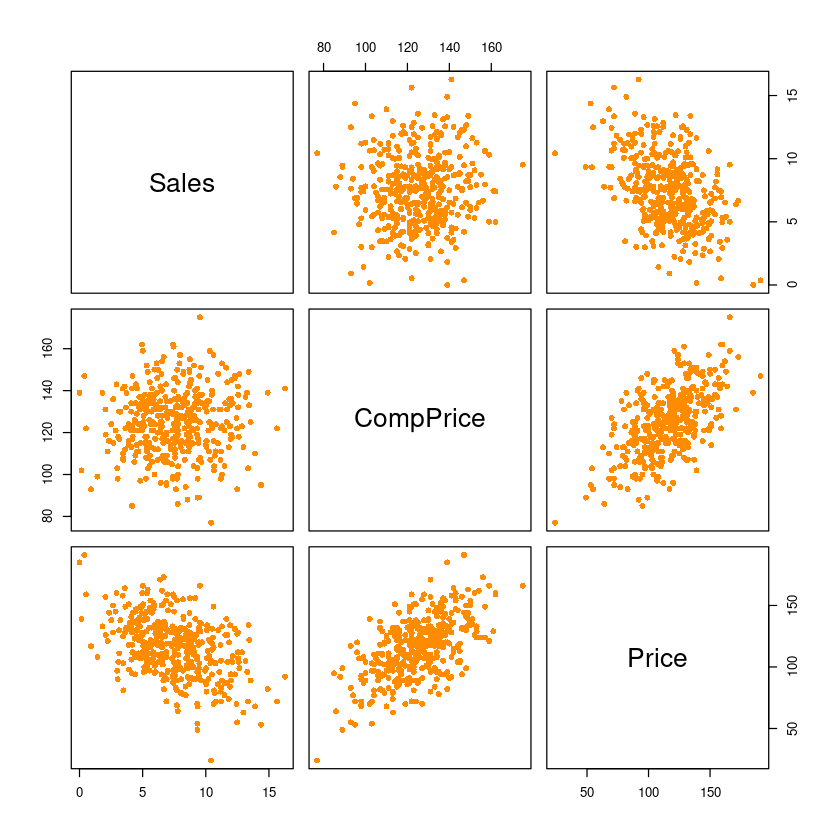

In [12]:
pairs(dt[,which(names(dt) %in% 
                      c('Sales', 'CompPrice', 'Price'))], 
      pch=16, col='darkorange')

In [13]:
cor(dt[,which(names(dt) %in% 
                      c('Sales', 'CompPrice', 'Price'))])

-   2,3번 문제에서 축소모형 하니까.. 1번 문제에서는 걍 전체로 돌리자

## (2)

Sales를 예측하기 위한 중회귀분석을 하려고 한다. 이를 위한 모형을
설정하시오.

In [57]:
fit_dt<-lm(Sales~., data=dt)
summary(fit_dt)

$\widehat {Sales} = 7.7076934 + 0.0939149 \widehat {CompPrice} + 0.012871 \widehat {Income} +0.1308637 \widehat {Advertising} -0.0001239 \widehat {Population} -0.0925226 \widehat {Price} -0.0449743 \widehat {Age} -0.0399844 \widehat {Education}$

In [56]:
fit__<-lm(Sales~CompPrice+Price, data=dt)
summary(fit__)


$\widehat {Sales} = 6.278692 + 0.090777 \widehat {CompPrice} -0.087458 \widehat {Price}$

## (3)

최소제곱법의 의한 회귀직선을 적합시키시키고, 모형 적합 결과를
설명하시오.

## (4)

회귀직선의 유의성 검정을 위한 가설을 설정하고, 분산분석표를 이용하여
가설 검정을 수행하시오.

$H_0:\beta_0=\dots=\beta_7=0$ vs. $H_1:not H_0$

In [58]:
anova(fit_dt)

In [72]:
null_model <- lm(Sales~1, data=dt)  
fit_dt <- lm(Sales~., data=dt) 

anova(null_model, fit_dt) 

-   회귀직선은 유의하다.

In [73]:
(1723.713/7)/(1458.562/392)

## (5)

오차의 분산에 대한 추정량을 구하시오.

### matrix

In [20]:
n = nrow(dt)
X = cbind(rep(1,n), dt$CompPrice, dt$Income, dt$Advertising, dt$Population, dt$Price, dt$Age, dt$Education)
y = dt$Sales

In [23]:
beta_hat = solve(t(X)%*%X) %*% t(X) %*% y   # t(X): X^T를 의미함 
beta_hat
coef(fit_dt)

In [24]:
y_hat = X %*% beta_hat
y_hat[1:5]
fitted(fit_dt)[1:5]

In [74]:
sse <- sum((y - y_hat)^2) ##SSE
sqrt(sse/(n-7-1)) ##RMSE
summary(fit_dt)$sigma

In [80]:
mse <- sse/(n-7-1)
mse

## (6)

결정계수와 수정된 결정계수를 구하시오.

In [26]:
summary(fit_dt)

-   $R^2:0.5417, R^2_{adj}: 0.5335$

## (7)

개별 회귀계수의 유의성검정을 수행하시오.

In [28]:
summary(fit_dt)$coef

## (8)

회귀계수에 대한 90% 신뢰구간을 구하시오.

In [61]:
confint(fit_dt, level = 0.90)

## (9)

CompPrice = 100, Income = 70, Advertising = 20, Population = 300, Price
= 80, Education = 12인 지역에 위치한 매장의 평균 판매액을 예측하고, 95%
신뢰구간을 구하시오.

In [63]:
new_dt <- data.frame(CompPrice=100, Income=70, Advertising=20, Population=300, Price=80, Age=53, Education=12)

In [64]:
predict(fit_dt, 
        newdata = new_dt,
        interval = c("confidence"), 
        level = 0.95)  ##평균반응

-   문제에서 Age에 대한 값이 명시되지 않아서.. 일단 age는 평균 값 넣어서
    계산함

## (10)

위 매장에 대하여 개별 판매액 예측하고, 95% 신뢰구간을 구하시오.

In [65]:
predict(fit_dt, newdata = new_dt, 
        interval = c("prediction"), 
        level = 0.95)  ## 개별 y

## (11)

잔차에 대한 산점도를 그리고, 결과를 설명하여라.

In [66]:
yhat <- fitted(fit_dt)
res <- resid(fit_dt)

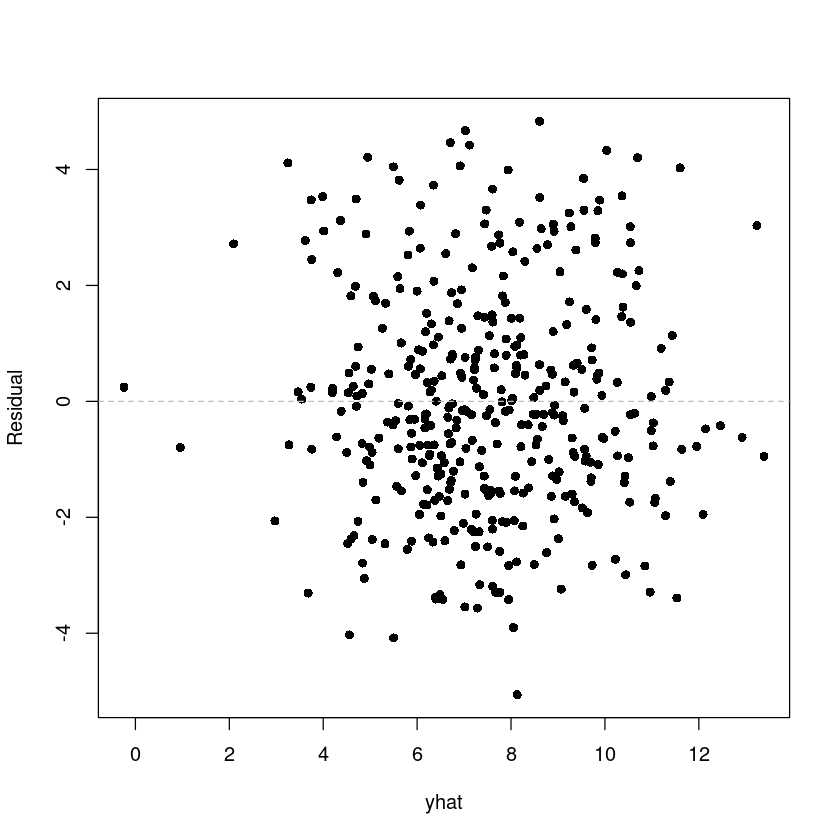

In [67]:
plot(res ~ yhat,pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')

선형성은 없어보이고, 등분산성이 있어보인다.

## (12)

잔차에 대한 등분산성 검정을 수행하여라.

$H_0$:등분산 VS. $H_1$:이분산

In [41]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [42]:
bptest(fit_dt)

-   p-valeur가 커서 $H_0$를 채택한다. 즉 등분산성이다.

## (13)

잔차에 대한 히스토그램, QQ plot을 그리고, 정규성 검정을 수행하여라.

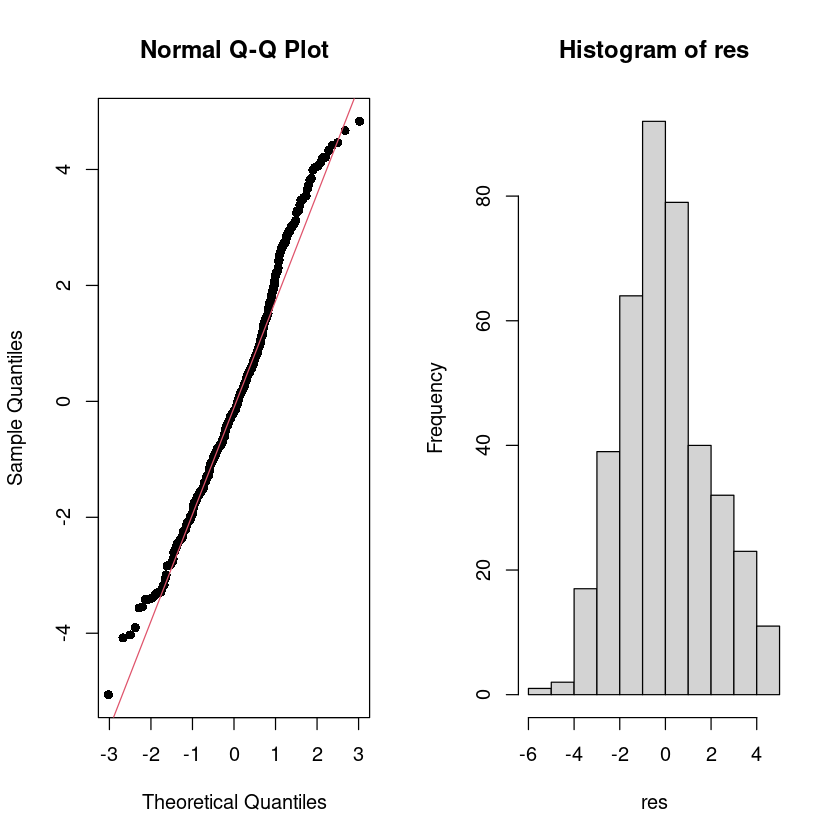

In [68]:
par(mfrow=c(1,2))
qqnorm(res, pch=16)
qqline(res, col = 2)

hist(res)
par(mfrow=c(1,1))

-   정규성을 만족해 보인다.

In [44]:
## H0 : normal distribution  vs. H1 : not H0
shapiro.test(res)

## (14)

잔차에 대한 독립성 검정을 수행하시오.

$H_0$:uncorrelated

In [69]:
dwtest(fit_dt, alternative = "two.sided") 

-   독립이다.

# 2번

위 데이터에 대하여 다음 물음에 답하여라. (R을 이용하여 풀이)(검정에서는
유의수준 $α = 0.05$ 사용)

## (1)

위에서 적합한 모형에서 개별 회귀계수의 유의성 검정 결과 유의하지 않은
변수는 무엇인가?

Population, Education은 유의하지 않은 변수이다.

## (2)

위에서 유의하지 않았던 변수를 제외한 모형을 축소모형(Reduced Model)으로
하는 부분 F검정을 수행하여라. 검정에 필요한 가설을 설정하고, 검정 결과를
설명하시오.

In [89]:
reduced_model<-lm(Sales~.-Population-Education, data=dt)


In [50]:
anova(reduced_model, fit_dt)

## (3)

1번에서 설정한 모형과, 축소모형 중 어느 모형이 이 데이터에 대한 설명을
잘 하고 있는지를 비교하시오.

In [90]:
summary(reduced_model)
summary(fit_dt)

# 3번

1번에서 설정한 모형에 대하여 아래의 일반 선형 가설검정(General Linear
Hypothesis Test)을 수행하시오. (R을 이용하여 풀이)(검정에서는 유의수준
$α = 0.05$ 사용)(회귀계수는 $β_i$로 표현해야 하지만, 각자 설정이 다를
수가 있기 때문에 회귀계수 대신 변수 이름을 사용하겠음. 예
$β_1 =CompPrice$)

## (1)

$H_0 : CompPrice=Income$ vs. $H_1 : not H_0$

In [54]:
install.packages("car")

Installing package into ‘/home/coco/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)


``` r
linearHypothesis(dt_fit, c(0,1,-1,0,0,0,0,0),0)
```

## (2)

$H_0 : CompPrice=-Price$ vs. $H_1 : not H_0$

``` r
linearHypothesis(fit_dt, c(0,1,0,0,0,1,0,0),0)
```

## (3)

$H_0$를 기각할 수 있는 제약조건을 만들어 보시오.(단 2개 이상의 변수
사용)